<a href="https://colab.research.google.com/github/ViMasHub/Test_Kontur/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import librosa
import librosa.display
import IPython.display as ipd

# Загрузка и анализ аудио сигнала

In [ ]:
audio_file = '/1.opus'
signal, sr = librosa.load(audio_file)

In [ ]:
# посмотрим тип нашей переменный signal

print(type(signal), type(sr))
print(signal.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(176400,) 22050


In [ ]:
# плеер

ipd.Audio(audio_file)

# Визулизация сигнала


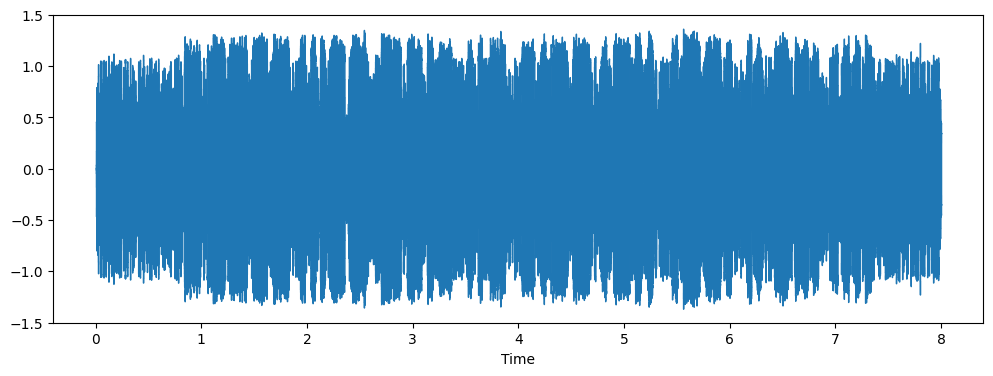

In [ ]:
# визулизация аудиосигнала

plt.figure(figsize=(12,4))
librosa.display.waveshow(signal, sr=sr)

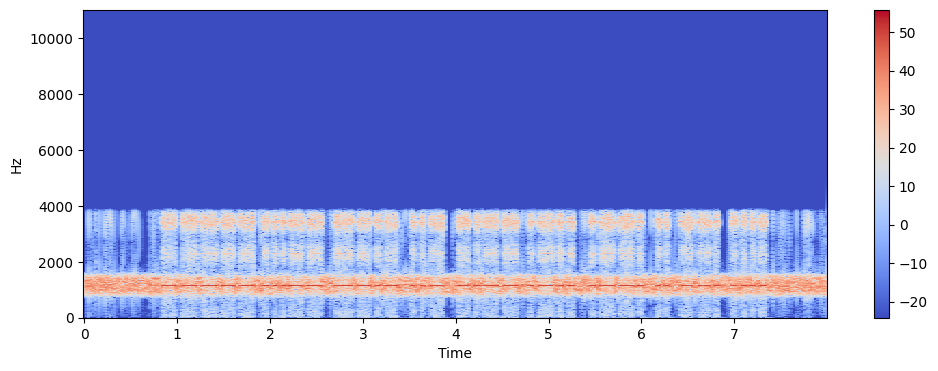

In [ ]:
# частота - цветности

plt.figure(figsize=(12,4))
x = librosa.stft(signal) # разбивка аудиосигнала на сигменты (2048)
xdb= librosa.amplitude_to_db(abs(x)) # переводим в ДЦб
librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

#df_xdb=pd.DataFrame(data=xdb)
#df_xdb

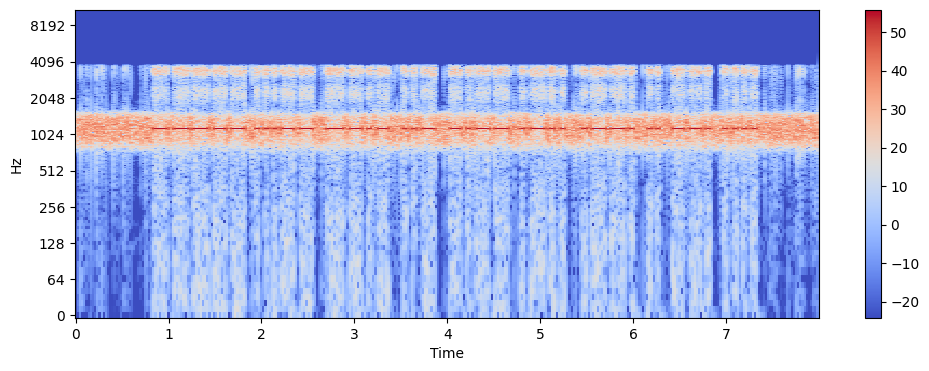

In [ ]:
# Log частота - цветности

plt.figure(figsize=(12,4))
librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Извлечение признаков из аудио сигнала



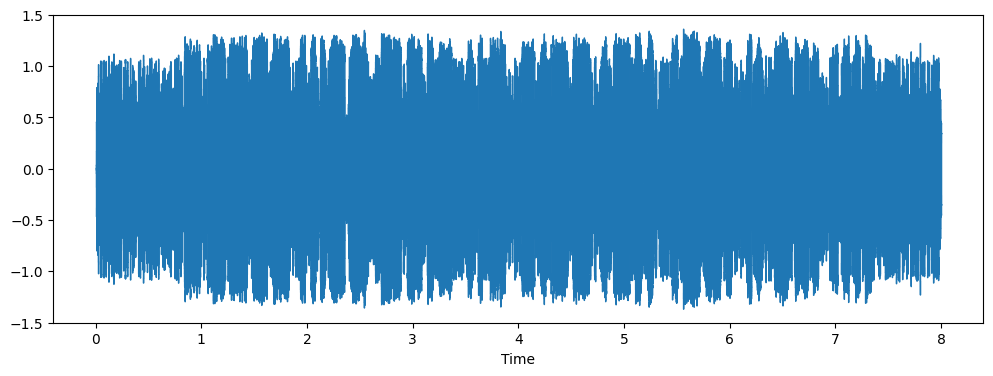

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(signal, sr=sr)

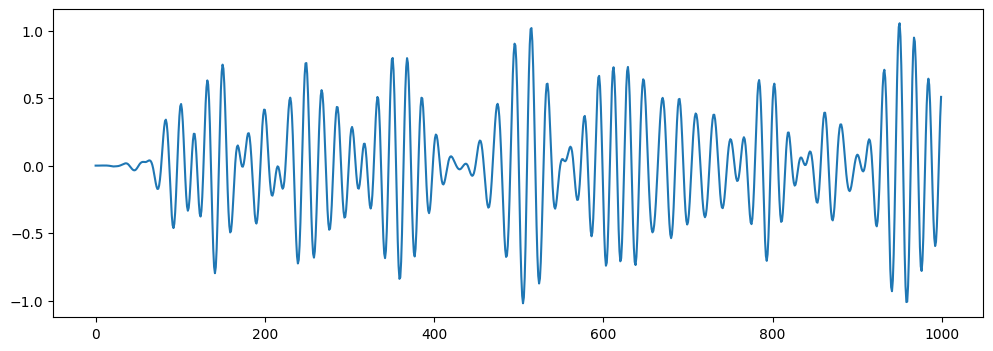

In [ ]:
# фрагмент аудиосигнала
n0 = 0
n1 = 1000
plt.figure(figsize=(12,4))
plt.plot(signal [n0 : n1])
plt.grid(which = 'minor',
         color = 'grey',
         linestyle = 'solid')
plt.show()

In [ ]:
# пересечение с нулем

zero_crossing = librosa.zero_crossings(signal[n0 : n1], pad=False)

print (type(zero_crossing))
print(zero_crossing.sum())
print()

<class 'numpy.ndarray'>
106



(345,)


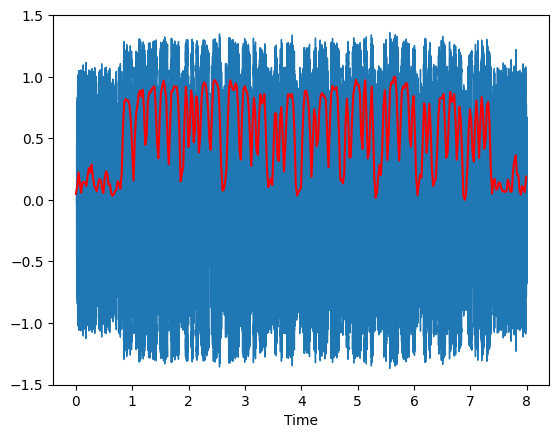

In [ ]:
# спектральный центроид

spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=sr)[0]
print(spectral_centroids.shape)

# вычисление времени для визулизации

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# нормализация центрального центроида

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

# построим график

librosa.display.waveshow(signal, sr=sr)
plt.plot(t, normalize(spectral_centroids), color='red')

<class 'numpy.ndarray'>


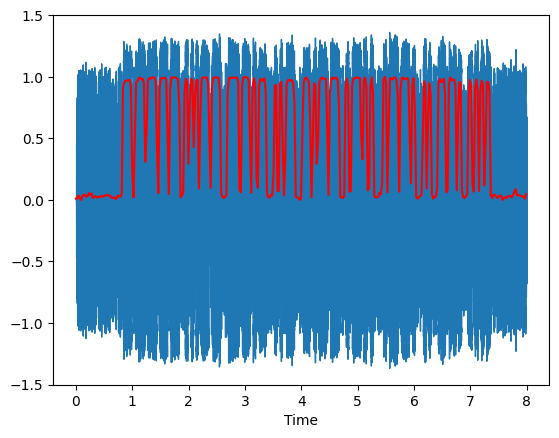

In [ ]:
# спектральный спад частоты

spectral_rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr)[0]
print(type(spectral_rolloff))

# вычисление времени для визулизации

frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

# нормализация центрального центроида

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

# построим график

librosa.display.waveshow(signal, sr=sr)
plt.plot(t, normalize(spectral_rolloff), color='red')

<class 'numpy.ndarray'>


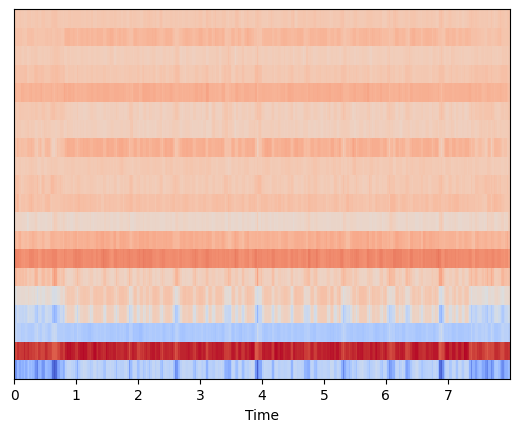

In [ ]:
# мел - частотные кепстральный коээфиценты

# делим сигнал на 512 точек

mfccs = librosa.feature.mfcc(y=signal, sr=sr)
print(type(mfccs))

librosa.display.specshow(mfccs, sr=sr, x_axis='time')


<class 'numpy.ndarray'>


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
0,-3.988033,-1.863091,-0.669647,-0.702997,-1.210098,-0.808979,-0.984841,-0.511159,-1.073721,-0.577530,...,0.069067,0.108064,-0.381326,-1.044503,-1.862084,-2.187654,-1.298342,-0.973169,-0.930439,-0.494750
1,-4.293821,-1.696998,-0.077042,-0.045716,-0.714197,-0.549765,-0.686579,0.391181,-0.460434,-0.199456,...,0.204821,0.167366,-0.259922,-1.434491,-1.886940,-1.913276,-0.733367,-0.180338,0.019660,-0.490242
2,4.523238,2.228150,1.351469,1.142891,1.348072,0.229530,0.526831,0.715691,1.150294,0.640802,...,-0.660311,-0.732037,-0.084273,0.260571,1.492124,2.070870,1.357792,1.346729,1.594335,0.868442
3,-2.519215,-1.531033,-0.816848,-0.975941,-1.242786,-1.194960,-1.286194,-1.041691,-1.318491,-0.856772,...,-0.485074,-0.395192,-0.745199,-1.026670,-1.679801,-2.033458,-1.454180,-1.162633,-1.068361,-0.694823
4,-2.287056,-1.669303,-1.047112,-1.095285,-1.036422,-0.960631,-0.993051,-0.866824,-1.152724,-1.172178,...,-0.672453,-0.526246,-0.919490,-1.342036,-1.584286,-1.853338,-1.250210,-0.880568,-0.901578,-0.787596
5,3.476808,1.959868,1.047853,1.017404,1.238879,1.074417,1.312498,0.683760,1.172797,0.158493,...,-0.245643,-0.159448,0.159192,0.243192,1.607373,2.045067,1.332594,1.168313,0.803454,1.068292
6,0.961633,1.288251,0.609926,0.745853,-0.128118,-1.381572,-1.631692,-2.137949,-1.333210,-1.262120,...,-0.979150,-0.447096,-0.159476,-0.380972,-1.193127,-1.350432,-1.883117,-1.081169,-0.516106,-3.201075
7,0.310631,-1.272887,-1.932913,-0.702643,0.200907,-1.905865,-2.414957,-1.862958,-1.670231,-2.407381,...,-1.557495,-0.916315,-0.451363,-0.541907,-1.546622,-1.588438,-2.214030,-0.677796,0.716341,-1.389624
8,2.725515,0.544158,0.101469,0.784382,0.766082,0.262433,-0.016460,-0.057207,-0.204857,-2.753780,...,-0.973695,-0.257292,0.296174,0.515645,1.734781,2.049072,-0.309395,0.547153,0.641396,3.228277
9,-2.863168,1.181334,3.377554,1.705260,-2.033148,-0.661775,-0.545424,-0.190401,-0.994579,-0.751125,...,1.790949,1.383729,0.906990,1.197167,0.020624,-0.726918,-1.217575,-1.464242,-1.729327,-1.674248


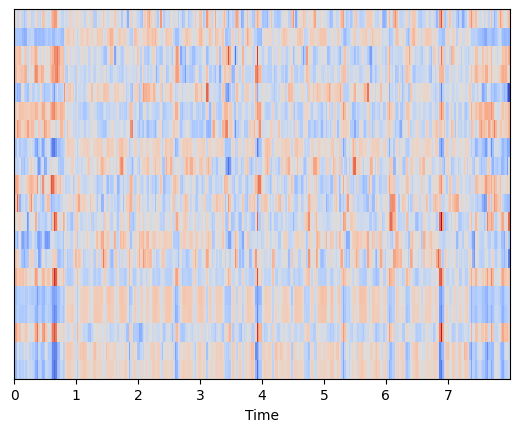

In [ ]:
# преобразуем рисунок

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(type(mfccs))

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# df_mfccs = pd.DataFrame(data=mfccs)
# df_mfccs


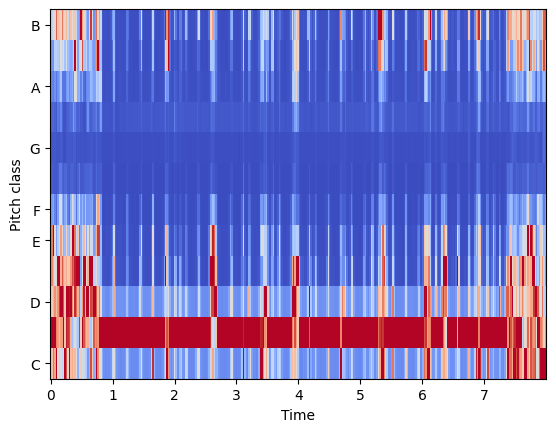

In [ ]:
# частота - цветность

hop_lenght = 512

chromagram = librosa.feature.chroma_stft(y=signal, sr=sr, hop_length = hop_lenght)

librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis = 'chroma', hop_length = hop_lenght, cmap = 'coolwarm')

# Классификация аудио сигналов

In [1]:
# Загрузим библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

from tensorflow.keras import utils, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os
import librosa

In [ ]:
# Загрузка данных и извлечение признаков

# Загрузка аудиофайлов
uploaded_files = files.upload()



Выходные данные были обрезаны до нескольких последних строк (5000).
Saving 25001.opus to 25001.opus
Saving 25002.opus to 25002.opus
Saving 25003.opus to 25003.opus
Saving 25004.opus to 25004.opus
Saving 25005.opus to 25005.opus
Saving 25006.opus to 25006.opus
Saving 25007.opus to 25007.opus
Saving 25008.opus to 25008.opus
Saving 25009.opus to 25009.opus
Saving 25010.opus to 25010.opus
Saving 25011.opus to 25011.opus
Saving 25012.opus to 25012.opus
Saving 25013.opus to 25013.opus
Saving 25014.opus to 25014.opus
Saving 25015.opus to 25015.opus
Saving 25016.opus to 25016.opus
Saving 25017.opus to 25017.opus
Saving 25018.opus to 25018.opus
Saving 25019.opus to 25019.opus
Saving 25020.opus to 25020.opus
Saving 25021.opus to 25021.opus
Saving 25022.opus to 25022.opus
Saving 25023.opus to 25023.opus
Saving 25024.opus to 25024.opus
Saving 25025.opus to 25025.opus
Saving 25026.opus to 25026.opus
Saving 25027.opus to 25027.opus
Saving 25028.opus to 25028.opus
Saving 25029.opus to 25029.opus
Savi

In [ ]:
df_train=pd.read_csv('train.csv')

#df_train_work = df_train.head(28).copy()

#df_train_work.head()


In [ ]:
# Признаки
def extract_features(uploaded_files):
    audio, sr = librosa.load(uploaded_files, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)
    return np.mean(mfccs.T, axis=0)

# Создание обучающего набора данных

data = []
labels = []

audio_files = np.array(df_train['id'])
transcriptions = np.array(df_train['message'])

for uploaded_files, transcriptions in zip(audio_files, transcriptions):
    features = extract_features(uploaded_files)
    data.append(features)
    labels.append(transcriptions)

<ipython-input-66-f90165287b1d>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(uploaded_files, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '1.opus'

In [ ]:
save_data = pd.DataFrame(data = data)
save_data['label']= labels
save_data.to_csv('/save_data.csv')

In [2]:
# Повторная загрузка

data_load = pd.read_csv('/content/save_data.csv')

data=[]
labels=[]

data = data_load.drop(['Unnamed: 0'], axis=1)
data = data.drop(['label'], axis=1)
labels = data_load['label']

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11.142733,-20.562162,-94.629450,-39.684044,78.344330,21.435408,-18.506500,-11.924711,14.740015,-14.052806,-0.736263,17.732796,-16.442839,10.868788,-11.638367,6.311684,-7.375807,14.011086,-5.251327,-3.022855
1,56.546940,-19.987713,-96.718475,-41.036636,75.072464,1.917538,-15.085211,-4.996938,14.788522,-6.327874,-3.304983,6.510915,-10.791756,9.496203,-4.640778,5.969134,-7.958448,3.892930,-0.875174,-0.505362
2,106.325900,75.803154,-30.816576,-46.180397,-70.121870,-4.541588,17.177563,-18.475874,5.117954,-2.170022,-0.983680,7.276010,-0.256146,7.361406,-3.995539,-0.528571,-1.331794,-2.053808,-0.171634,0.815180
3,113.334700,96.638820,-20.520998,-18.045229,-56.736763,-29.734743,9.803234,-5.085704,-10.545817,0.751717,-11.997690,1.648132,-0.193113,2.762126,5.897166,-0.504910,1.187157,-0.242076,-0.732413,-0.517716
4,101.784740,129.989780,-10.196630,5.778158,-16.935568,-32.503498,-22.590086,-1.277477,2.665274,-6.088985,-4.240004,-5.731417,-5.985148,-1.023705,-1.248537,-3.783196,-3.836029,-5.216537,-1.927654,-1.528724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,21.078983,-27.013126,-124.283690,-10.874165,73.567474,-40.948154,9.876983,-7.978509,8.483199,-4.406654,10.100677,-7.755579,0.250399,0.519047,0.647879,0.090672,3.848894,-3.768427,-2.997067,4.162908
29996,59.828228,-13.783641,-99.589580,-52.452360,67.946260,4.594869,-7.990647,-8.365574,8.857268,-3.048979,-4.433075,10.919272,-6.656361,0.108950,-6.483983,6.794322,-0.061226,0.118952,-3.139821,2.674678
29997,-18.904293,80.515040,-46.516663,-100.606735,-72.675350,24.147880,-6.227135,-31.890886,15.616905,-14.061712,17.118156,-2.454125,11.584543,5.033321,1.925911,-5.348799,-2.003859,2.796613,6.146740,-1.847372
29998,-100.198620,16.391933,-132.165620,-89.897064,57.067837,41.944847,-28.242699,19.655434,-13.521498,-1.095951,-7.972685,12.404526,-6.363621,-8.623717,6.270756,4.585767,-1.308309,-6.342100,0.772143,2.576230


In [3]:
# Нормализация данных

from sklearn.preprocessing import MinMaxScaler

minmax_scaler=MinMaxScaler()
data_norm = minmax_scaler.fit_transform(data)

In [15]:
labels = data_load['label']

# Токенизация текстовых меток

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(labels)
sequences = tokenizer.texts_to_sequences(labels)

# Дополнение последовательностей до одинаковой длины
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length)


text = tokenizer.sequences_to_texts(padded_sequences)


,label
0,03ЩУЫЛПИГХ
1,ЪЛТ0ДС6А3Г
2,5ЭКЫБЗХЯН
3,ЖЫЦОИ68КФ
4,32Ю7МЫ ЗЛ
...,...
29995,ЬДТРЭ 9М6М
29996,ЬКТ1 ШЭЪ
29997,ЫВЙЗБЯН7К
29998,ФЯДШ3Т#


In [ ]:
# Разделим данные
#from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer()
#y_vectorized = vectorizer.fit_transform(labels)

#x_train, x_test, y_train, y_test = train_test_split(data_norm, y_vectorized, test_size=0.2, random_state=42)




In [ ]:
# Обучение моделей

x_train = data_norm
y_train = padded_sequences

# RandomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=8,
    min_samples_leaf=3,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42
        )

model.fit(x_train, y_train)

#y_pred = model.predict(x_test)

# Нейронка

#model_NN = Sequential()
#model_NN.add(layers.Dense(256, activation = 'elu', input_shape= (20,)))
#model_NN.add(layers.Dense(128, activation = 'elu'))
#model_NN.add(layers.Dense(64, activation = 'elu'))
#model_NN.add(layers.Dense(32, activation = 'elu'))
#model_NN.add(layers.Dense(10, activation = 'softmax'))

#model_NN.compile(optimizer = Adam(),
 #             loss = 'sparse_categorical_crossentropy',
  #            metrics = ['accuracy'])

#history = model_NN.fit(x_train, y_train,
 #                     epochs = 10,
   #                   batch_size = 20,
    #                  validation_data = (x_test, y_test))

# Визулизация обучения

#plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
#plt.show()

# Сохранение моделей

#import joblib

#joblib.dump(model, '/model_RF.pkl')

#joblib.dump(model_NN, '/model_NN.pkl')

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=50, random_state=42)

ValueError: X has 20 features, but RandomForestClassifier is expecting 21 features as input.

In [ ]:
df_test = pd.read_csv('/content/test.csv')


In [ ]:
# Загрузка нескольких аудиофайлов
uploaded_files_2 = files.upload()

Saving 30001.opus to 30001.opus
Saving 30002.opus to 30002.opus
Saving 30003.opus to 30003.opus
Saving 30004.opus to 30004.opus
Saving 30005.opus to 30005.opus
Saving 30006.opus to 30006.opus
Saving 30007.opus to 30007.opus
Saving 30008.opus to 30008.opus
Saving 30009.opus to 30009.opus
Saving 30010.opus to 30010.opus
Saving 30011.opus to 30011.opus
Saving 30012.opus to 30012.opus
Saving 30013.opus to 30013.opus
Saving 30014.opus to 30014.opus
Saving 30015.opus to 30015.opus
Saving 30016.opus to 30016.opus
Saving 30017.opus to 30017.opus
Saving 30018.opus to 30018.opus
Saving 30019.opus to 30019.opus
Saving 30020.opus to 30020.opus
Saving 30021.opus to 30021.opus
Saving 30022.opus to 30022.opus
Saving 30023.opus to 30023.opus
Saving 30024.opus to 30024.opus
Saving 30025.opus to 30025.opus
Saving 30026.opus to 30026.opus
Saving 30027.opus to 30027.opus
Saving 30028.opus to 30028.opus
Saving 30029.opus to 30029.opus
Saving 30030.opus to 30030.opus
Saving 30031.opus to 30031.opus
Saving 3

In [ ]:
# Признаки
def extract_features_2(uploaded_files):
    audio_2, sr = librosa.load(uploaded_files_2, sr=None)
    mfccs_2 = librosa.feature.mfcc(y=audio_2, sr=sr)
    return np.mean(mfccs_2.T, axis=0)

data_2 = []
labels_2 = []

audio_files_2 = np.array(df_test['id'])


for uploaded_files_2 in audio_files_2:
    features_2 = extract_features_2(uploaded_files_2)
    data_2.append(features_2)



In [ ]:
save_data_2 = pd.DataFrame(data = data_2)
save_data_2.to_csv('/save_data_2.csv')

In [ ]:
# Повторная загрузка

data_load_2 = pd.read_csv('/content/save_data_2.csv')

data_2 = data_load_2.drop(['Unnamed: 0'], axis=1)

data_2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,117.510124,101.556390,-27.429207,-18.127390,-49.625190,-24.672575,5.698385,-2.491035,-16.000292,-3.243744,0.669765,2.049179,-0.193947,-5.263638,-1.112841,-1.972289,2.462259,1.530744,2.060866,1.551814
1,55.376570,-13.973883,-107.431860,-44.138454,70.236410,-10.134935,-2.918529,-8.306085,7.535438,-5.763657,2.098673,9.390421,-5.920766,-3.099110,-2.110695,4.725393,-1.355731,0.097024,-0.881497,0.621559
2,70.996376,-19.270855,-116.870810,-23.809160,64.064020,-33.180202,9.179727,-8.474136,4.831543,-4.188954,9.260820,-0.224093,-4.438443,-0.064042,1.230342,0.544079,1.783031,-0.743246,-2.132316,1.449533
3,-91.732260,57.621597,-4.928532,-56.843914,-103.307526,-41.839184,26.242830,-8.549740,5.392328,23.066288,-28.353968,9.867104,-5.316731,6.506259,4.951064,16.448315,1.354173,-1.607424,-3.025329,-13.384399
4,69.888990,132.126710,-4.547739,6.611872,-14.561352,-31.487510,-30.651785,-7.762793,6.749294,-4.488794,-7.508243,-3.382807,-7.990163,-3.899029,1.025613,-3.883533,-3.947449,-8.151990,-4.898617,-2.780009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-366.055630,79.723500,-138.884200,-121.299070,37.454662,81.427376,12.069049,-19.446098,-0.019001,-1.512395,-15.975401,-4.830906,12.368484,9.516898,2.247850,2.405666,-3.896305,-16.922120,-17.979618,-6.778089
4996,-321.420930,199.382540,102.626175,3.255163,-53.340170,-56.885487,-29.853415,-3.354094,5.602323,-0.618916,-10.103237,-13.836056,-10.836972,-5.693182,-3.176300,-4.694711,-7.931312,-9.281111,-6.920380,-2.370222
4997,-316.321660,165.531660,-24.403944,-121.188210,-81.034400,-12.049933,-3.170829,-28.894325,-29.356457,-5.908050,2.736180,-8.605361,-12.435682,0.139104,9.780103,5.293960,-1.613223,-0.434634,3.032525,1.742748
4998,-315.271600,150.025900,-7.509669,-108.957530,-97.262314,-32.850616,0.096372,-12.319374,-25.599094,-11.883005,9.963907,13.249321,1.643274,-3.759400,2.485904,7.452904,3.743006,-0.553168,2.728396,8.901252


In [ ]:
# Нормализация данных

from sklearn.preprocessing import MinMaxScaler

minmax_scaler=MinMaxScaler()
data_norm_2 = minmax_scaler.fit_transform(data_2)

# Предсказание

x_test = data_norm_2

y_pred = model.predict(x_test)

#y_pred_NN = model_NN.predict(x_test)

df_test=pd.read_csv('/content/test.csv')
df_test['message'] = y_pred
#df_test['label_NN'] = y_pred_NN

df_test.head(5)

In [ ]:
# Выгрузка данных

df_test=df_test.drop(['label_RF'], axis = 1)


df_test

NameError: name 'df_test' is not defined

In [ ]:
df_test.to_csv('/submission.csv', index=None)